# CIS 419/519 
#**Homework 3 : Logistic Regression**

In [3]:
import pandas as pd
import numpy as np


### Logistic Regression

In [4]:
class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2,
                 epsilon=0.0001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
            alpha is the learning rate
            regLambda is the regularization parameter
            regNorm is the type of regularization 
            (either L1 or L2, denoted by a 1 or a 2)
            epsilon is the convergence parameter
            maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.initTheta = initTheta
        self.finalTheta = None
    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  
            ** make certain you're not returning a 1 x 1 matrix! **
        '''
        h = self.sigmoid(X*theta) # h is a n-by-1 numpy matrix
        cost_1 = -y.T*np.log(h)-(1-y.T)*np.log(1-h)
        if self.regNorm==2:
            cost_2 = regLambda*theta[1:].T*theta[1:]
        elif self.regNorm==1:
            cost_2 = regLambda*np.abs(theta[1:]).sum()
        else:
            raise ValueError('regNorm is not 1 or 2!')
        cost = cost_1 + cost_2
        cost = cost.item() # convert 1 x 1 matrix to scalar
        return cost

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        h = self.sigmoid(X*theta) # h is a n-by-1 numpy matrix
        grad_1 = X.T*(h-y)
        if self.regNorm==2:
            grad_2 = regLambda*theta
        elif self.regNorm==1:
            grad_2 = regLambda*np.sign(theta)
        else:
            raise ValueError('regNorm is not 1 or 2!')
        grad_2[0] = 0
        grad = grad_1 + grad_2 # grad is a d-by-1 numpy matrix
        return grad.astype(float)
    
    def hasConverged(self, new_theta, old_theta, epsilon):
        '''
        Determine if learning process has converged
        Arguments:
            new_theta is a d-by-1 numpy matrix
            old_theta is a d-by-1 numpy matrix
            epsilon is convergence threshold
        Returns:
            boolean variable representing convergence
        '''
        return np.linalg.norm(new_theta-old_theta)<epsilon


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n,d = X.shape
        if self.initTheta is None:
            self.initTheta = np.zeros((d+1,1))
        self.initTheta = np.asmatrix(self.initTheta)
        # initialize
        X = np.c_[np.ones((n,1)), X]
        theta = self.initTheta.copy()
        old_theta = self.initTheta.copy()
        iter_num = 0
        # change data frame to numpy matrix
        X = np.asmatrix(X).astype(np.float)
        y = np.asmatrix(y.to_numpy()).astype(np.float)
        y = y.reshape(-1,1)
        # gradient descent
        while True:
            # compute cost
            cost = self.computeCost(theta, X, y, self.regLambda)
            grad = self.computeGradient(theta, X, y, self.regLambda)
            theta -= self.alpha*grad
            if self.hasConverged(theta,old_theta,self.epsilon):
                print(f'cost: {cost}')
                print(f'iteration: {iter_num}')
                self.finalTheta = theta.copy()
                break
            if iter_num > self.maxNumIters:
                print(f'cost: {cost}')
                print(f'Reach maximum iterations!')
                self.finalTheta = theta.copy()
                break
            old_theta = theta.copy()
            iter_num += 1


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        return pd.DataFrame(self.predict_proba(X)>0.5).astype(int)

    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        n,_ = X.shape
        X = np.c_[np.ones((n,1)), X]
        X = np.asmatrix(X)
        return pd.DataFrame(self.sigmoid(X*self.finalTheta))



    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        return 1/(1+np.exp(-Z))

# Test Logistic Regression 1

cost: 20.34985559747419
iteration: 803


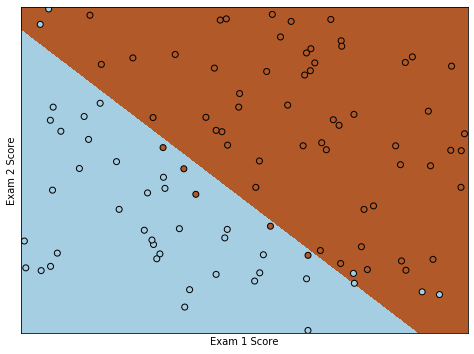

In [5]:
# Test script for training a logistic regressiom model
#
# This code should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg1():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegression(regLambda = 0.00000001)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

test_logreg1()

# Map Feature

In [6]:
def mapFeature(X, column1, column2, maxPower = 6):
    '''
    Maps the two specified input features to quadratic features. Does not standardize any features.
        
    Returns a new feature array with d features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the maxPower polynomial
        
    Arguments:
        X is an n-by-d Pandas data frame, where d > 2
        column1 is the string specifying the column name corresponding to feature X1
        column2 is the string specifying the column name corresponding to feature X2
    Returns:
        an n-by-d2 Pandas data frame, where each row represents the original features augmented with the new features of the corresponding instance
    '''
    new_X = X.copy()
    for power in range(maxPower+1):
        for i in range(power+1):
            X1, X2 = X[column1], X[column2]
            new_col = (X1**(power-i))*(X2**i)
            new_X = pd.concat([new_X,new_col],axis=1)
    new_X.columns = np.arange(0,new_X.shape[1])
    new_X = new_X.drop([0,1],axis=1)
    return new_X



# Test Logistic Regression 2

cost: 33.23792687969409
Reach maximum iterations!


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:163: RuntimeWarning: overflow encountered in exp


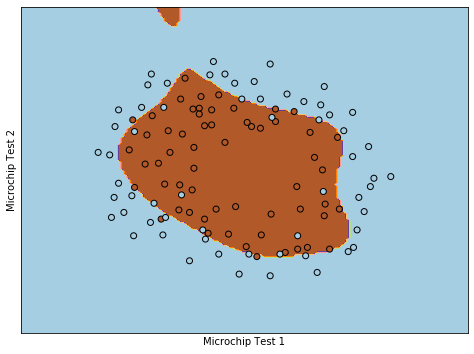

0 1


In [6]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg2():

    polyPower = 6

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegression(regLambda = 0.00000001, regNorm=2)
    logregModel.fit(Xaug,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = mapFeature(allPoints, allPoints.columns[0], allPoints.columns[1], polyPower)
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # standardize data
    
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()


    print(str(Z.min()) + " " + str(Z.max()))

test_logreg2()

# Logistic Regression with Adagrad

In [7]:
from sklearn.utils import shuffle
class LogisticRegressionAdagrad:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2,
                 epsilon=0.0001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
            alpha is the learning rate
            regLambda is the regularization parameter
            regNorm is the type of regularization 
            (either L1 or L2, denoted by a 1 or a 2)
            epsilon is the convergence parameter
            maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.initTheta = initTheta
        self.theta = None
        self.cumulateGrad = None
    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  
            ** make certain you're not returning a 1 x 1 matrix! **
        '''
        h = self.sigmoid(X*theta) # h is a n-by-1 numpy matrix
        cost_1 = -y.T*np.log(h)-(1-y.T)*np.log(1-h)
        if self.regNorm==2:
            cost_2 = regLambda*theta[1:].T*theta[1:]
        elif self.regNorm==1:
            cost_2 = regLambda*np.abs(theta[1:]).sum()
        else:
            raise ValueError('regNorm is not 1 or 2!')
        cost = cost_1 + cost_2
        cost = cost.item() # convert 1 x 1 matrix to scalar
        return cost

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient according to Adagrad
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
        Returns:
            the gradient, an d-dimensional vector
        '''
        zeta = 1E-7
        h = self.sigmoid(X*theta)
        gk_1 = X.T*(h-y)
        if self.regNorm==2:
            gk_2 = regLambda*theta
        elif self.regNorm==1:
            gk_2 = regLambda*np.sign(theta)
        else:
            raise ValueError('regNorm is not 1 or 2!')
        gk_2[0] = 0
        gk = gk_1 + gk_2
        self.cumulateGrad += np.multiply(gk,gk)
        grad = gk/(np.sqrt(self.cumulateGrad)+zeta)
        return grad
    
    
    def hasConverged(self, new_theta, old_theta, epsilon):
        '''
        Determine if learning process has converged
        Arguments:
            new_theta is a d-by-1 numpy matrix
            old_theta is a d-by-1 numpy matrix
            epsilon is convergence threshold
        Returns:
            boolean variable representing convergence
        '''
        return np.linalg.norm(new_theta-old_theta)<epsilon


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n,d = X.shape
        if self.initTheta is None:
            self.initTheta = np.zeros((d+1,1))
        self.initTheta = np.asmatrix(self.initTheta)
        # initialize
        X = np.c_[np.ones((n,1)), X]
        theta = self.initTheta.copy()
        old_theta = self.initTheta.copy()
        iter_num = 0
        self.cumulateGrad = np.asmatrix(np.zeros((d+1,1)))
        # change data frame to numpy matrix
        X = np.asmatrix(X).astype(np.float)
        y = np.asmatrix(y.to_numpy()).astype(np.float)
        y = y.reshape(-1,1)
        # Stochastic Gradient Descent
        while True:
            # compute cost
            cost = self.computeCost(theta, X, y, self.regLambda)
            # shuffle data set
            X,y = shuffle(X,y)
            for instance in range(n):
                cur_X, cur_y = X[instance], y[instance]
                grad = self.computeGradient(theta, cur_X, cur_y, self.regLambda)
                theta -= self.alpha*grad
                
                if iter_num > self.maxNumIters:
                    print(f'cost: {cost}')
                    print(f'Reach maximum iterations!')
                    self.theta = theta.copy()
                    return
                
            if self.hasConverged(theta,old_theta,self.epsilon):
                    print(f'cost: {cost}')
                    print(f'iteration: {iter_num}')
                    self.theta = theta.copy()
                    return
            old_theta = theta.copy()
            iter_num += 1
                


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        return pd.DataFrame(self.predict_proba(X)>0.5).astype(int)

    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        n,_ = X.shape
        X = np.c_[np.ones((n,1)), X]
        X = np.asmatrix(X)
        return pd.DataFrame(self.sigmoid(X*self.theta))


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        return 1/(1+np.exp(-Z))

# Test Adagrad 1

cost: 22.3517306300613
iteration: 6448


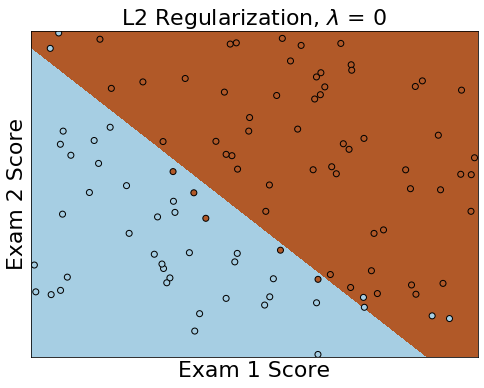

In [12]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def test_logreg1():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # # Standardize features
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegressionAdagrad(regLambda = 0, regNorm = 2)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.title('L2 Regularization, $\lambda$ = 0',fontsize=22)
    plt.xlabel('Exam 1 Score',fontsize=22)
    plt.ylabel('Exam 2 Score',fontsize=22)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

test_logreg1()

# Test Adagrad 2

cost: 37.70660652632264
iteration: 7579


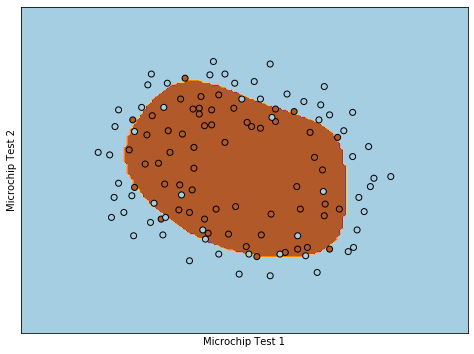

0 1


In [11]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def test_logreg2():

    polyPower = 6

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # # Standardize features
    standardizer = StandardScaler()
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegressionAdagrad(regLambda = 0.00000001, regNorm=2)
    logregModel.fit(Xaug,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = mapFeature(allPoints, allPoints.columns[0], allPoints.columns[1], polyPower)
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # standardize data
    
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()


    print(str(Z.min()) + " " + str(Z.max()))
    
test_logreg2()

# Cross Validation

In [8]:
from sklearn.model_selection import KFold

def cross_validated_accuracy(model, X, y, num_trials, num_folds):
    accuracy_list = []
    for trial in range(num_trials):
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=trial)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
            y_train, y_test = y[train_index], y[test_index]
    
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            y_pred = y_pred[0].astype('O')
            accuracy = (y_test.values == y_pred.values).sum()/len(y_test)
            accuracy_list.append(accuracy)
            print(accuracy)
    cvScore = np.mean(accuracy_list)
    return cvScore

# Preprocessing

In [9]:
import pandas as pd
import numpy as np
def convertToBinarySeries(inputSeries):
    if inputSeries.isna().sum() > 0:
        raise ValueError('cannot convert')
        return
    firstVal = inputSeries.loc[0]
    for i in range(len(inputSeries)):
        if inputSeries.loc[i] != firstVal:
            secondVal = inputSeries.loc[i]
            break
    outSeries = inputSeries.copy()
    outSeries[inputSeries == firstVal] = 1
    outSeries[inputSeries == secondVal] = 0
    return outSeries

# Compare Algorithms

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# filepath = "hw3-wdbc.csv"
# filepath = "hw3-retinopathy.csv"
filepath = "hw3-diabetes.csv"
df = pd.read_csv(filepath, header=None)

X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

n,d = X.shape
    
# X = preprocessing(X,0.5)
y = convertToBinarySeries(y)
    
standardizer = StandardScaler()
X = pd.DataFrame(standardizer.fit_transform(X))
    
regLambda = 1
    
logregModel1 = LogisticRegression(regLambda = regLambda, regNorm=1, alpha = 0.001)
# logregModel2 = LogisticRegression(regLambda = regLambda, regNorm=2, alpha = 0.001)
# logregModel3 = LogisticRegressionAdagrad(regLambda = regLambda, regNorm=1, alpha = 0.001)
# logregModel4 = LogisticRegressionAdagrad(regLambda = regLambda, regNorm=2, alpha = 0.001)
    
score1 = cross_validated_accuracy(logregModel1,X,y,3,5)
# score2 = cross_validated_accuracy(logregModel2,X,y,3,5)
# score3 = cross_validated_accuracy(logregModel3,X,y,3,5)
# score4 = cross_validated_accuracy(logregModel4,X,y,3,5)
    
print(f'\nscore1: {score1}')
# print(f'score2: {score2}')
# print(f'score3: {score3}')
# print(f'score4: {score4}')

cost: 299.6314390985775
iteration: 126
0.8246753246753247
cost: 290.5443715973808
iteration: 128
0.7792207792207793
cost: 288.3174635342908
Reach maximum iterations!
0.7402597402597403
cost: 288.4276734688373
iteration: 158
0.7450980392156863
cost: 292.2558148903379
iteration: 130
0.7777777777777778
cost: 291.93101926968063
iteration: 136
0.7792207792207793
cost: 287.4462508188696
Reach maximum iterations!
0.7597402597402597
cost: 285.90841930909664
iteration: 145
0.7662337662337663
cost: 298.61107344358
iteration: 137
0.7908496732026143
cost: 290.7976740525175
iteration: 139
0.7450980392156863
cost: 289.8864396400699
iteration: 153
0.7662337662337663
cost: 287.53329496543614
iteration: 145
0.7532467532467533
cost: 288.0474867253039
iteration: 119
0.7532467532467533
cost: 294.1701037402602
iteration: 136
0.7908496732026143
cost: 297.19892768903435
Reach maximum iterations!
0.7843137254901961

score1: 0.7704043233454999


# Learning Curve

In [10]:
def learning_curves(model, X, y, max_iteration):
    accuracy_list = []
    num_trials = 5
    num_folds = 5
    for iter_num in range(max_iteration):
        model.maxNumIters = iter_num
        cvScore = cross_validated_accuracy(model, X, y, num_trials, num_folds)
        accuracy_list.append(cvScore)
        print(f'iter_num: {iter_num}')
    return accuracy_list

cost: 116.94753780553769
Reach maximum iterations!
0.9122807017543859
cost: 115.0167671431
Reach maximum iterations!
0.8947368421052632
cost: 114.86529113011537
Reach maximum iterations!
0.956140350877193
cost: 114.09968991778503
Reach maximum iterations!
0.9473684210526315
cost: 120.53676944275648
Reach maximum iterations!
0.9911504424778761
cost: 110.03546394208173
Reach maximum iterations!
0.9298245614035088
cost: 114.34227301658291
Reach maximum iterations!
0.9385964912280702
cost: 115.6977595065378
Reach maximum iterations!
0.9298245614035088
cost: 122.47371583900288
Reach maximum iterations!
0.9385964912280702
cost: 119.33208271000905
Reach maximum iterations!
0.9646017699115044
cost: 115.91986976316124
Reach maximum iterations!
0.9385964912280702
cost: 113.4715812583799
Reach maximum iterations!
0.9035087719298246
cost: 118.0821742004508
Reach maximum iterations!
0.9736842105263158
cost: 116.32383999952143
Reach maximum iterations!
0.9649122807017544
cost: 117.6987935321347
Reac

cost: 75.19289114776386
Reach maximum iterations!
0.9380530973451328
cost: 77.0190279273202
Reach maximum iterations!
0.956140350877193
cost: 81.17362511090042
Reach maximum iterations!
0.9736842105263158
cost: 79.3069109264196
Reach maximum iterations!
0.9736842105263158
cost: 73.71052389369204
Reach maximum iterations!
0.9649122807017544
cost: 79.3463999218235
Reach maximum iterations!
0.9646017699115044
iter_num: 4
cost: 73.91030827945146
Reach maximum iterations!
0.956140350877193
cost: 74.5753569147413
Reach maximum iterations!
0.956140350877193
cost: 71.06185421455842
Reach maximum iterations!
0.9649122807017544
cost: 74.46418578338321
Reach maximum iterations!
0.9736842105263158
cost: 77.25099823681738
Reach maximum iterations!
0.9911504424778761
cost: 72.00262964879182
Reach maximum iterations!
0.956140350877193
cost: 72.29702263433177
Reach maximum iterations!
0.956140350877193
cost: 71.97719926119966
Reach maximum iterations!
0.956140350877193
cost: 79.85468796786304
Reach ma

cost: 68.3690394559265
Reach maximum iterations!
0.9912280701754386
cost: 63.611421448075184
Reach maximum iterations!
0.9823008849557522
cost: 63.70766883533467
Reach maximum iterations!
0.956140350877193
cost: 59.73584717267268
Reach maximum iterations!
0.956140350877193
cost: 65.71186912230597
Reach maximum iterations!
0.9912280701754386
cost: 64.2989216201217
Reach maximum iterations!
0.9824561403508771
cost: 63.832854875006134
Reach maximum iterations!
0.9557522123893806
cost: 62.96929880010575
Reach maximum iterations!
0.9473684210526315
cost: 68.74694592309724
Reach maximum iterations!
1.0
cost: 64.83308892092363
Reach maximum iterations!
0.9824561403508771
cost: 59.46377182431165
Reach maximum iterations!
0.956140350877193
cost: 61.372965242608565
Reach maximum iterations!
0.9646017699115044
cost: 62.76218917115097
Reach maximum iterations!
0.956140350877193
cost: 66.86349301483301
Reach maximum iterations!
0.9824561403508771
cost: 64.5814667728076
Reach maximum iterations!
0.9

cost: 57.872358605312634
Reach maximum iterations!
0.9736842105263158
cost: 61.36503150145504
Reach maximum iterations!
0.9911504424778761
cost: 56.59278554224743
Reach maximum iterations!
0.956140350877193
cost: 56.88259806065679
Reach maximum iterations!
0.956140350877193
cost: 55.78296536235342
Reach maximum iterations!
0.956140350877193
cost: 62.67787807676517
Reach maximum iterations!
0.9912280701754386
cost: 57.882915060855915
Reach maximum iterations!
0.9823008849557522
cost: 58.221492988888755
Reach maximum iterations!
0.9649122807017544
cost: 54.25915133461767
Reach maximum iterations!
0.956140350877193
cost: 60.50626130586941
Reach maximum iterations!
0.9912280701754386
cost: 58.97138819414115
Reach maximum iterations!
0.9824561403508771
cost: 58.57941036588525
Reach maximum iterations!
0.9557522123893806
cost: 57.49448029191035
Reach maximum iterations!
0.9736842105263158
cost: 63.298655620935484
Reach maximum iterations!
1.0
cost: 59.521258516477374
Reach maximum iterations

cost: 53.520183813815464
Reach maximum iterations!
0.9649122807017544
cost: 53.84401955318319
Reach maximum iterations!
0.9649122807017544
cost: 52.60407784847533
Reach maximum iterations!
0.9736842105263158
cost: 59.22818485567141
Reach maximum iterations!
0.9912280701754386
cost: 54.35489867063572
Reach maximum iterations!
0.9823008849557522
cost: 54.895686581587626
Reach maximum iterations!
0.9736842105263158
cost: 50.930771020272196
Reach maximum iterations!
0.9649122807017544
cost: 57.33296112692589
Reach maximum iterations!
0.9912280701754386
cost: 55.719978589541874
Reach maximum iterations!
0.9824561403508771
cost: 55.42640576468482
Reach maximum iterations!
0.9734513274336283
cost: 54.152305420637205
Reach maximum iterations!
0.9736842105263158
cost: 59.9646760351353
Reach maximum iterations!
1.0
cost: 56.326083017063205
Reach maximum iterations!
0.9912280701754386
cost: 50.66669764007218
Reach maximum iterations!
0.9649122807017544
cost: 53.35750109822674
Reach maximum iterat

cost: 52.63380648107345
Reach maximum iterations!
0.9736842105263158
cost: 48.66497801105056
Reach maximum iterations!
0.9736842105263158
cost: 55.17592951036948
Reach maximum iterations!
0.9912280701754386
cost: 53.50236330972082
Reach maximum iterations!
0.9824561403508771
cost: 53.302217925182276
Reach maximum iterations!
0.9823008849557522
cost: 51.88504574871935
Reach maximum iterations!
0.9736842105263158
cost: 57.69438590527226
Reach maximum iterations!
1.0
cost: 54.15941625804615
Reach maximum iterations!
0.9912280701754386
cost: 48.39887209656643
Reach maximum iterations!
0.9649122807017544
cost: 51.3374038574817
Reach maximum iterations!
0.9734513274336283
cost: 52.373590871105336
Reach maximum iterations!
0.9824561403508771
cost: 56.049973336766136
Reach maximum iterations!
0.9912280701754386
cost: 53.932134040158516
Reach maximum iterations!
0.9736842105263158
cost: 47.894852513279304
Reach maximum iterations!
0.9736842105263158
cost: 52.346251165652085
Reach maximum iterat

cost: 50.29034200349826
Reach maximum iterations!
0.956140350877193
cost: 48.88206579861783
Reach maximum iterations!
0.9736842105263158
cost: 55.17385752489352
Reach maximum iterations!
0.9912280701754386
cost: 50.139434602935246
Reach maximum iterations!
0.9823008849557522
cost: 50.98341205638228
Reach maximum iterations!
0.9824561403508771
cost: 47.00368363864689
Reach maximum iterations!
0.9736842105263158
cost: 53.60574619294073
Reach maximum iterations!
0.9912280701754386
cost: 51.88170698610495
Reach maximum iterations!
0.9824561403508771
cost: 51.759284817870814
Reach maximum iterations!
0.9823008849557522
cost: 50.22271736664475
Reach maximum iterations!
0.9736842105263158
cost: 56.03611897601212
Reach maximum iterations!
1.0
cost: 52.5796346030714
Reach maximum iterations!
0.9912280701754386
cost: 46.748943481932045
Reach maximum iterations!
0.9736842105263158
cost: 49.87630821627075
Reach maximum iterations!
0.9823008849557522
cost: 50.817405093102366
Reach maximum iteration

0.9824561403508771
cost: 44.46073820204525
Reach maximum iterations!
0.9649122807017544
cost: 49.114722993014205
Reach maximum iterations!
0.9736842105263158
cost: 53.37195898930555
Reach maximum iterations!
1.0
cost: 48.74801601859966
Reach maximum iterations!
0.9649122807017544
cost: 49.14702927783572
Reach maximum iterations!
0.956140350877193
cost: 47.69055157820087
Reach maximum iterations!
0.9736842105263158
cost: 53.86477188473496
Reach maximum iterations!
0.9912280701754386
cost: 48.75850879786056
Reach maximum iterations!
0.9823008849557522
cost: 49.71924330132857
Reach maximum iterations!
0.9736842105263158
cost: 45.72534428823565
Reach maximum iterations!
0.9736842105263158
cost: 52.40151859092943
Reach maximum iterations!
0.9912280701754386
cost: 50.64128967461042
Reach maximum iterations!
0.9824561403508771
cost: 50.58243427407374
Reach maximum iterations!
0.9823008849557522
cost: 48.94294653263117
Reach maximum iterations!
0.9736842105263158
cost: 54.76321079028993
Reach 

cost: 48.240089490425774
Reach maximum iterations!
0.956140350877193
cost: 46.74627401897378
Reach maximum iterations!
0.9736842105263158
cost: 52.82542044154446
Reach maximum iterations!
0.9912280701754386
cost: 47.65481137114921
Reach maximum iterations!
0.9823008849557522
cost: 48.715641473254614
Reach maximum iterations!
0.9736842105263158
cost: 44.706199816862224
Reach maximum iterations!
0.9736842105263158
cost: 51.44653509050186
Reach maximum iterations!
0.9912280701754386
cost: 49.6615958435907
Reach maximum iterations!
0.9824561403508771
cost: 49.65210706273582
Reach maximum iterations!
0.9823008849557522
cost: 47.9217647741018
Reach maximum iterations!
0.9736842105263158
cost: 53.75091563753328
Reach maximum iterations!
1.0
cost: 50.40938746292688
Reach maximum iterations!
0.9912280701754386
cost: 44.4913021325065
Reach maximum iterations!
0.9736842105263158
cost: 47.89154225929887
Reach maximum iterations!
0.9823008849557522
cost: 48.68710814140661
Reach maximum iterations!


cost: 47.07533320640486
Reach maximum iterations!
0.9649122807017544
cost: 47.501078301388006
Reach maximum iterations!
0.956140350877193
cost: 45.9776003901413
Reach maximum iterations!
0.9649122807017544
cost: 51.97669656820503
Reach maximum iterations!
0.9912280701754386
cost: 46.74910123103851
Reach maximum iterations!
0.9823008849557522
cost: 47.89663657783777
Reach maximum iterations!
0.9736842105263158
cost: 43.87121347842301
Reach maximum iterations!
0.9736842105263158
cost: 50.66604363747655
Reach maximum iterations!
0.9912280701754386
cost: 48.86394398551333
Reach maximum iterations!
0.9824561403508771
cost: 48.895451631591364
Reach maximum iterations!
0.9823008849557522
cost: 47.085789065433424
Reach maximum iterations!
0.9736842105263158
cost: 52.92291940260075
Reach maximum iterations!
1.0
cost: 49.625420028680715
Reach maximum iterations!
0.9912280701754386
cost: 43.68498690894109
Reach maximum iterations!
0.9736842105263158
cost: 47.18198092988638
Reach maximum iteration

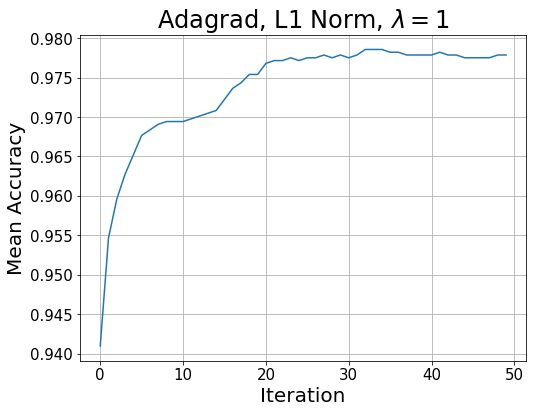

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
filepath = "hw3-wdbc.csv"
df = pd.read_csv(filepath, header=None)

X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

n,d = X.shape

y = convertToBinarySeries(y)

standardizer = StandardScaler()
X = pd.DataFrame(standardizer.fit_transform(X))

logregModel = LogisticRegression(regLambda = 1, regNorm=1, alpha = 0.001)
# logregModel = LogisticRegression(regLambda = 1, regNorm=1, alpha = 0.01)
# logregModel = LogisticRegression(regLambda = 1, regNorm=1, alpha = 0.1)

# logregModel = LogisticRegression(regLambda = 1, regNorm=2, alpha = 0.001)
# logregModel = LogisticRegression(regLambda = 1, regNorm=2, alpha = 0.01)
# logregModel = LogisticRegression(regLambda = 1, regNorm=2, alpha = 0.1)

# logregModel = LogisticRegressionAdagrad(regLambda = 0, regNorm=1, alpha = 0.01)
# logregModel = LogisticRegressionAdagrad(regLambda = 1, regNorm=1, alpha = 0.01)

# logregModel = LogisticRegressionAdagrad(regLambda = 1, regNorm=2, alpha = 0.001)

max_iteration = 50

accuracy_list = learning_curves(logregModel, X, y, max_iteration)

plt.figure(1,figsize = (8,6))
plt.plot(np.arange(max_iteration),accuracy_list)
plt.tick_params(labelsize = 15)
plt.title('Adagrad, L1 Norm, $\lambda = 1$',fontsize = 24)
plt.xlabel('Iteration',fontsize = 20)
plt.ylabel('Mean Accuracy',fontsize = 20)
plt.grid(b=True)
plt.show()